# Jacobson Graph over $\mathbb{Z}_n$

## Preliminary

This notebook contains the research content and visualization of the paper _Jacobson Graph over $\mathbb{Z}_n$_ by Aditya and Intan-Alamsyah (2021). The usage of this notebook will help the reader visualize the graph easily with a simple Python coding and drawing a graph using package `networkx`. Feel free to discuss and you can also view the paper itself __[here](https://iopscience.iop.org/article/10.1088/1742-6596/1722/1/012027)__

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Since the research itself only contain integer number, no need to worry about including any additional package.

## How to draw a graph

For initiating a graph, simply use this syntax

In [3]:
G = nx.Graph()

The graph $G$ is a graph with no vertex and edge. So first, let we add some vertices to the graph.

In [10]:
# Adding a single vertex
G.add_node("Sulli")

# Adding a list of vertices
G.add_nodes_from([1,2,3,4])

The vertices can be anything as long as it's unique. One job done and next, we can view what are the vertices of $G$ and how many of them.

In [76]:
print("Vertex : " , G.nodes)
print("Number of nodes : " , G.number_of_nodes())
V = G.nodes


Vertex :  ['Sulli', 1, 2, 3, 4]
Number of nodes :  5


NodeView(('Sulli', 1, 2, 3, 4))

The important thing : How do we visualize them?

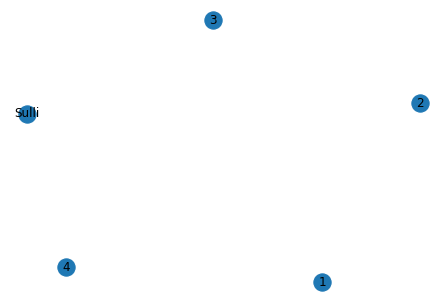

In [16]:
nx.draw(G, with_labels = True)

The location of the vertices can be a little random for another run. But for the detail, you can review it __[here](https://networkx.org/documentation/latest/tutorial.html#drawing-graphs)__.

Back again, this graph doesn't seem so interesting. Now we add some edges to it. For example, an edge that connect "Sulli" and 4.

In [18]:
# Adding a single edge
G.add_edge(1,"Sulli")

#Or we can add another edges
G.add_edges_from([(1,3),(2,4)])

#Now for viewing again list of edges that we already have and how many of them
print("Edges : " , G.edges)
print("Number of edges : " , G.number_of_edges())

Edges :  [('Sulli', 1), (1, 3), (2, 4)]
Number of edges :  3


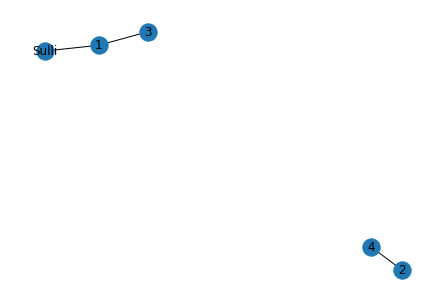

In [19]:
nx.draw(G, with_labels = True)

## Abstract

Let $n ≥ 2$. A Jacobson graph over $\mathbb{Z}_n$ is a graph with vertex set all elements in $\mathbb{Z}_n$ except elements in its Jacobson radical, and $x$ and $y$ are adjacent if and only if $1 − xy$ is not relative prime to $n$. In this paper, we give a characterization of Jacobson graph over $\mathbb{Z}_n$ as a foundation for Jacobson graph over a finite commutative ring.

## Definition and Initialization

### Ring and Jacobson radical

The paper itself contain many things about ring and ideals (mainly about maximal ideal). For a crash course definition, you can refer it __[here](https://brilliant.org/wiki/ring-theory/)__.

The Jacobson radical of a (commutative) ring $R$ is an intersection of all the maximal ideal of $R$. The Jacobson radical of $R$ can be denoted by $J(R)$

Ring $\mathbb{Z}_n$ is itself a ring of modulo $n$ for $n\geq 2$. It's easy to check that
$$J(\mathbb{Z}_n)=d\mathbb{Z}_n$$
with $d$ itself is a multiplication of all prime factors of $n$. Let's say that $n={p_1}^{q_1}...{p_k}^{q_k}$ with $p_i$ different prime numbers, then $d=p_1p_2...p_k$.

### Jacobson graph over $R$

A Jacobson graph over $R$, denoted by $\mathcal{J}_R$ is a graph with vertices set of $R\backslash J(R)$ and two vertices $x\neq y$ are connected by an edge if and only if $1-xy$ is not an unit in $R$.

To put it simple enough for $\mathbb{Z}_n$, Jacobson graph over $\mathbb{Z}_n$ is a graph with vertices all elements in $\mathbb{Z}_n$ except the multiple of $d$ (defined before) and two vertices $x,y$ are connected by an edge if and only if $1-xy$ is not prime relative with $n$.

### Define Jacobson graph over $\mathbb{Z}_n$

In [2]:
# It's involving gcd and finding prime factor of a number
# so before jumping into defining those graph
# fistly we need to define a function to calculate and find the products of all prime divisors of n
import math
def GCD(a,b): #finding GCD of two integers, using Euclidean Algorithm
    q = a//b
    r = a%b
    while(r != 0):
        a = b
        b = r
        
        q = a//b
        r = a%b
    return b

def prime_check(n): #checking whether an integer is a prime or not
    if n == 2 or n == 3:
        return True
    else:
        for x in range(2,int(math.sqrt(n)+1)):
            if n%x == 0:
                return False
    return True

def prime_factor(n): #finding all the prime factors of an integer
    k = n
    i = 2
    primes = []
    while i <= k:
        if k% i == 0:
            if prime_check(i):
                primes.append(i)
            k = k/i
        i+=1
    return primes

def prod_prime_factor(n): #multiply all the prime factors
    prod = 1
    for x in prime_factor(n):
        prod *= x
    return prod

Now, here are the main ingredients : Jacobson graph over $\mathbb{Z}_n$

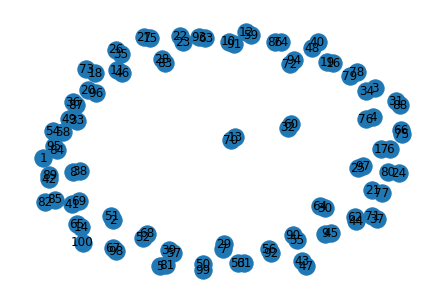

In [3]:
# Defining a Jacobson graph over Z_n

def Jacobson_graph_Z(n):
    G = nx.Graph()
    d = prod_prime_factor(n)
    vertices = [x for x in range(n) if x%d != 0]
    G.add_nodes_from(vertices)
    V = len(vertices)
    
    for i in range(V):
        for j in range(i+1,V):
            if GCD(1-vertices[i]*vertices[j],n) != 1:
                G.add_edge(vertices[i],vertices[j])
    
    return G



K = Jacobson_graph_Z(101)
nx.draw(K, pos = nx.spring_layout(K), with_labels = True)

For drawing it from the scratch or writing a syntax of it were quite challenging because at all, this Jacobson graph having some unique rule about connectivity. For some good numbers, the graph behave very well

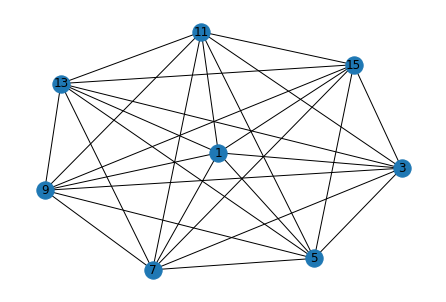

In [6]:
G1 = Jacobson_graph_Z(16)
nx.draw(G1, pos = nx.spring_layout(G1), with_labels = True)

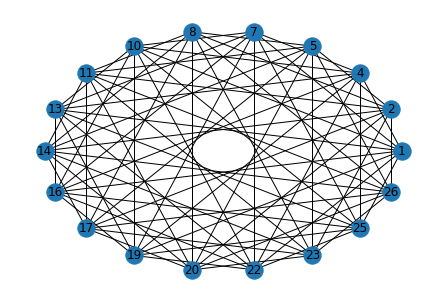

In [7]:
G2 = Jacobson_graph_Z(27)
nx.draw(G2, pos = nx.kamada_kawai_layout(G2), with_labels = True)

Others......not that much great

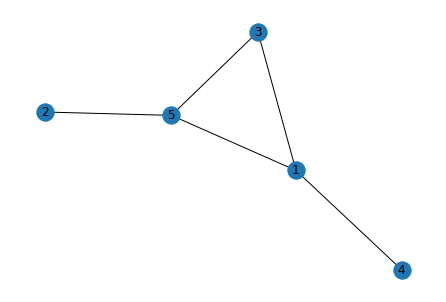

In [13]:
G3 = Jacobson_graph_Z(6)
nx.draw(G3, with_labels = True)

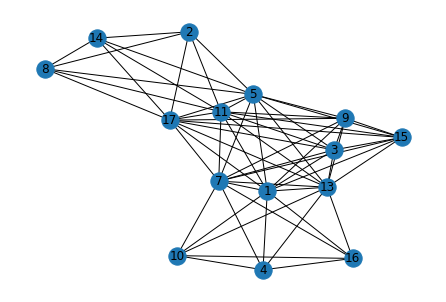

In [9]:
G4 = Jacobson_graph_Z(18)
nx.draw(G4, pos = nx.spring_layout(G4), with_labels = True)

## Connectivity

A graph $G$ is called connected if you can make a path from any two different vertices. A path from (let's say) $x$ to $y$ is the shortest sequence of vertex $v_0v_1v_2...v_n$ with $v_0=x$ and $v_n= y$ such that $v_{i-1}v_i$ is an edge in $G$ for $i=1,2,...,n$. Take an example in $\mathcal{J}_{\mathbb{Z}_6}$.

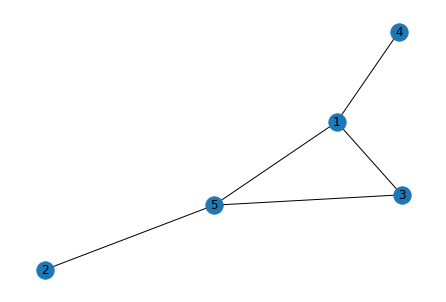

In [11]:
nx.draw(G3, pos = nx.spring_layout(G3), with_labels = True)

Take an example of vertex $3$ and $4$. We can create a path $3-1-4$. Even easier to observe from the image that it always connected. So, what is it like for a graph to be disconnected? Take an example of $\mathcal{J}_{\mathbb{Z}_9}$.

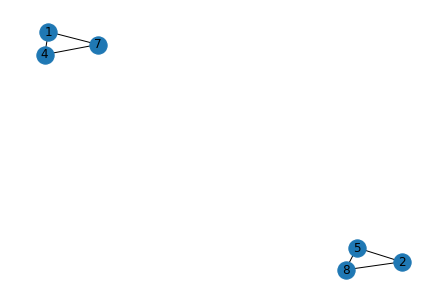

In [6]:
nx.draw(Jacobson_graph_Z(9), pos = nx.spring_layout(Jacobson_graph_Z(9)), with_labels = True)

From the image above, there are two 'clusters' from the same graph. Those two clusters (or next we call it component) are a whole part of the graph $\mathcal{J}_{\mathbb{Z}_9}$. So, under what condition of $n$ we can determine whether $\mathcal{J}_{\mathbb{Z}_n}$ is connected or not?

### $n$ is a prime power

Remember the Jacobson graph over $\mathbb{Z}_{27}$? It seems so beautiful and neat. But it's deceivingly connected when it turns out to be disconnected. For this case, set $n=p^k$ where $p$ any prime number and $k$ natural number.

One of the result is :
- If $p=2$, then it's connected only for $k>=2$ and it serves as a complete graph.
- For any odd prime $p$, it always disconnected. Further, there will be $\frac{p+1}{2}$ components.

Complete graph is a graph where every two different vertices are connected with an edge.

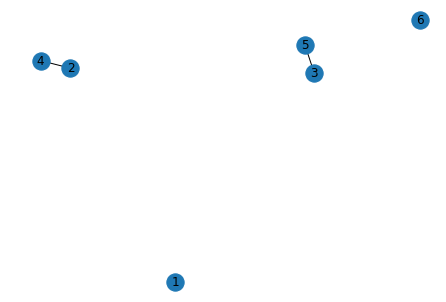

In [10]:
nx.draw(Jacobson_graph_Z(7), pos = nx.spring_layout(Jacobson_graph_Z(7)), with_labels = True)
#you can change the number inside Z(...) to experiment any cases of p^k

### $n$ is not a prime power

Others if $n$ is not a prime power (simply, having at least two prime factors) then Jacobson graph over $\mathbb{Z}_n$ always connected.

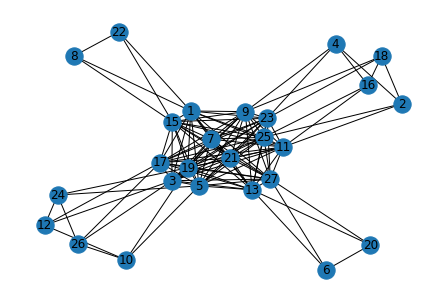

In [11]:
test = 28 #insert any number however you like

nx.draw(Jacobson_graph_Z(test), pos = nx.spring_layout(Jacobson_graph_Z(test)), with_labels = True)

## Diameter

Path from two different vertices can be shown as $v_0v_1...v_n$ where $v_0v_1, v_1v_2, ... v_{n-1}v_n$ are edges. The length of those paths is equal to $n$ or the number of edges that connect them.

Diameter of a (connected) graph is the maximum value of the length of the path for any two different vertices. Take example from the graph below.

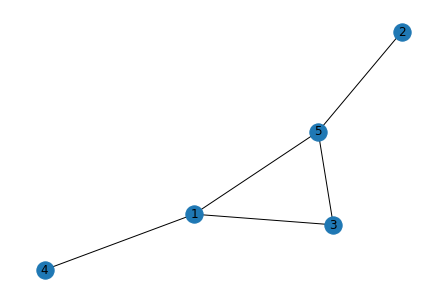

In [14]:
nx.draw(G3, pos = nx.spring_layout(G3), with_labels = True)

The path that connects $5$ to $4$ is $5-1-4$ and having length of $2$. Observe again $2$ and $4$ are connected by a path $2-5-1-4$ of length $3$. Since it's the longest path, we conclude the diameter of this graph is equal to 3.

### For any non-prime power $n$, Jacobson graph over $\mathbb{Z}_n$ always have the diameter of 3.

Since it exist a path of length 3 maximum for any two vertices, we can always set the diameter is equal to three. But unfortunately,

### There is no $n$ such that the diameter of Jacobson graph over $\mathbb{Z}_n$ is equal to 2.